In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel("rd.xlsx")
print(df.head())

    Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
0  87524       442.246011       253.291155      0.819738       90546   
1  75166       406.690687       243.032436      0.801805       78789   
2  90856       442.267048       266.328318      0.798354       93717   
3  45928       286.540559       208.760042      0.684989       47336   
4  79408       352.190770       290.827533      0.564011       81463   

     Extent  Perimeter    Class  
0  0.758651   1184.040  Kecimen  
1  0.684130   1121.786  Kecimen  
2  0.637613   1208.575  Kecimen  
3  0.699599    844.162  Kecimen  
4  0.792772   1073.251  Kecimen  


In [3]:
print(df.isna().sum())

Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
Extent             0
Perimeter          0
Class              0
dtype: int64


In [4]:
ndf = df.copy()
y = df["Class"]
ndf.drop("Class", inplace=True, axis=1)

In [5]:
sr = StandardScaler()
for i in list(ndf.columns):
  ndf[i] = sr.fit_transform(ndf[[i]])

In [6]:
lr = LabelEncoder()
y = lr.fit_transform(y)

In [7]:
x_train, x_test, y_train, y_test = train_test_split(ndf, y, test_size=0.2, random_state=33)

In [8]:
dtC = DecisionTreeClassifier(random_state=33)
dtC.fit(x_train, y_train)
y_pred = dtC.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

In [9]:
print(f"Accuracy -> {accuracy}")
print(f"Precision -> {precision}")
print(f"Recall -> {recall}")
print(f"F1-Score -> {f1}")

Accuracy -> 0.8
Precision -> 0.8039905225090409
Recall -> 0.8
F1-Score -> 0.7995051954477981


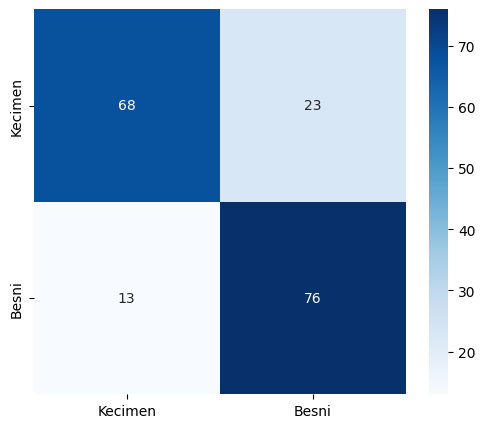

In [10]:
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Kecimen", "Besni"], yticklabels=["Kecimen", "Besni"])
plt.show()
plt.close()

Fold 1
Accuracy: 0.82
Precision: 0.83
Recall: 0.82
F1-Score: 0.82


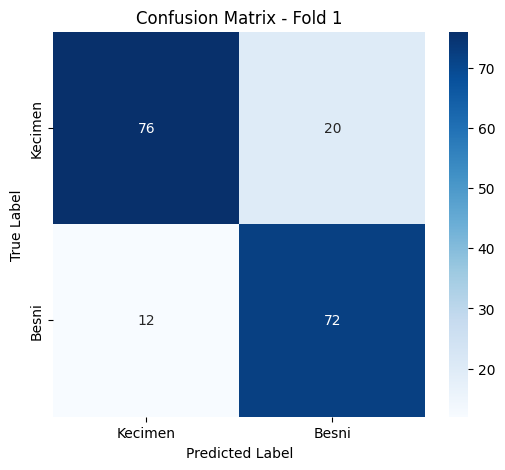

Fold 2
Accuracy: 0.83
Precision: 0.84
Recall: 0.83
F1-Score: 0.83


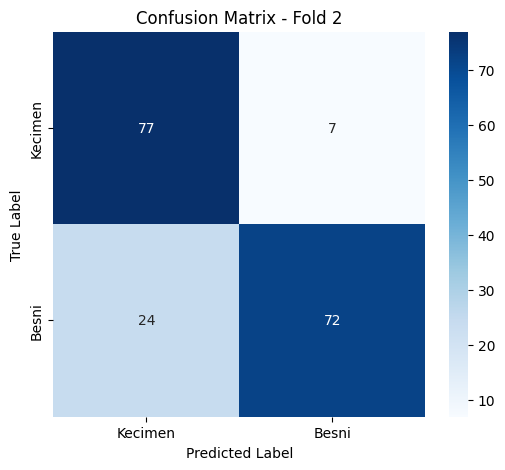

Fold 3
Accuracy: 0.84
Precision: 0.85
Recall: 0.84
F1-Score: 0.84


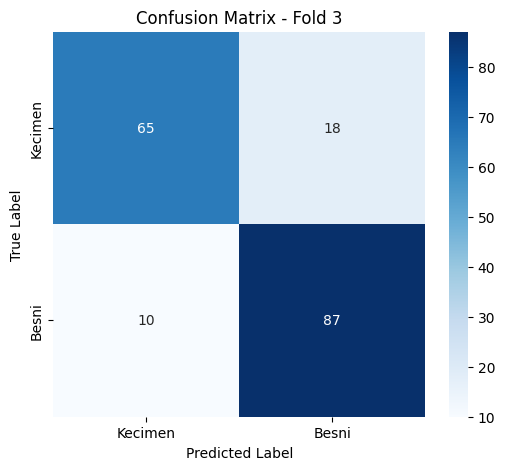

Fold 4
Accuracy: 0.79
Precision: 0.80
Recall: 0.79
F1-Score: 0.79


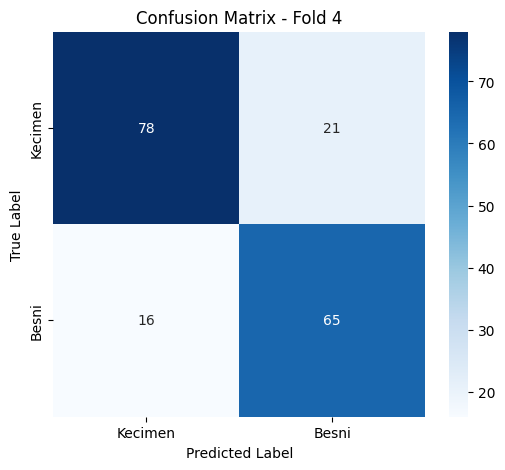

Fold 5
Accuracy: 0.86
Precision: 0.86
Recall: 0.86
F1-Score: 0.86


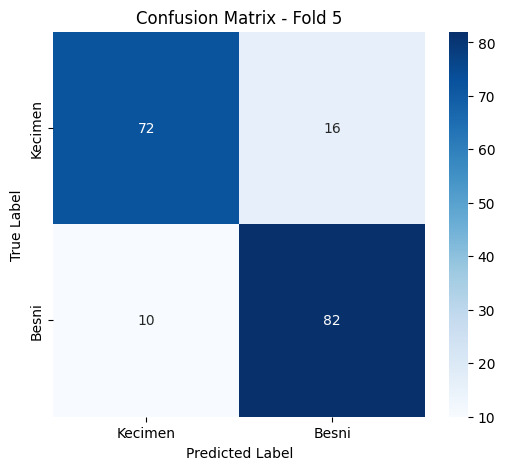

In [11]:
kf = KFold(n_splits=5, shuffle=True, random_state=30)
dtc = DecisionTreeClassifier(random_state=30)
acc = []
prec = []
rec = []
f1s = []

for fold, (train_index, test_index) in enumerate(kf.split(ndf)):
    print(f"Fold {fold + 1}")

    X_train, X_test = ndf.iloc[train_index], ndf.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    dtc.fit(X_train, y_train)
    y_pred = dtc.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)

    acc.append(accuracy)
    prec.append(precision)
    rec.append(recall)
    f1s.append(f1)

    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-Score: {f1:.2f}")

    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Kecimen", "Besni"], yticklabels=["Kecimen", "Besni"])
    plt.title(f'Confusion Matrix - Fold {fold + 1}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()
    plt.close()

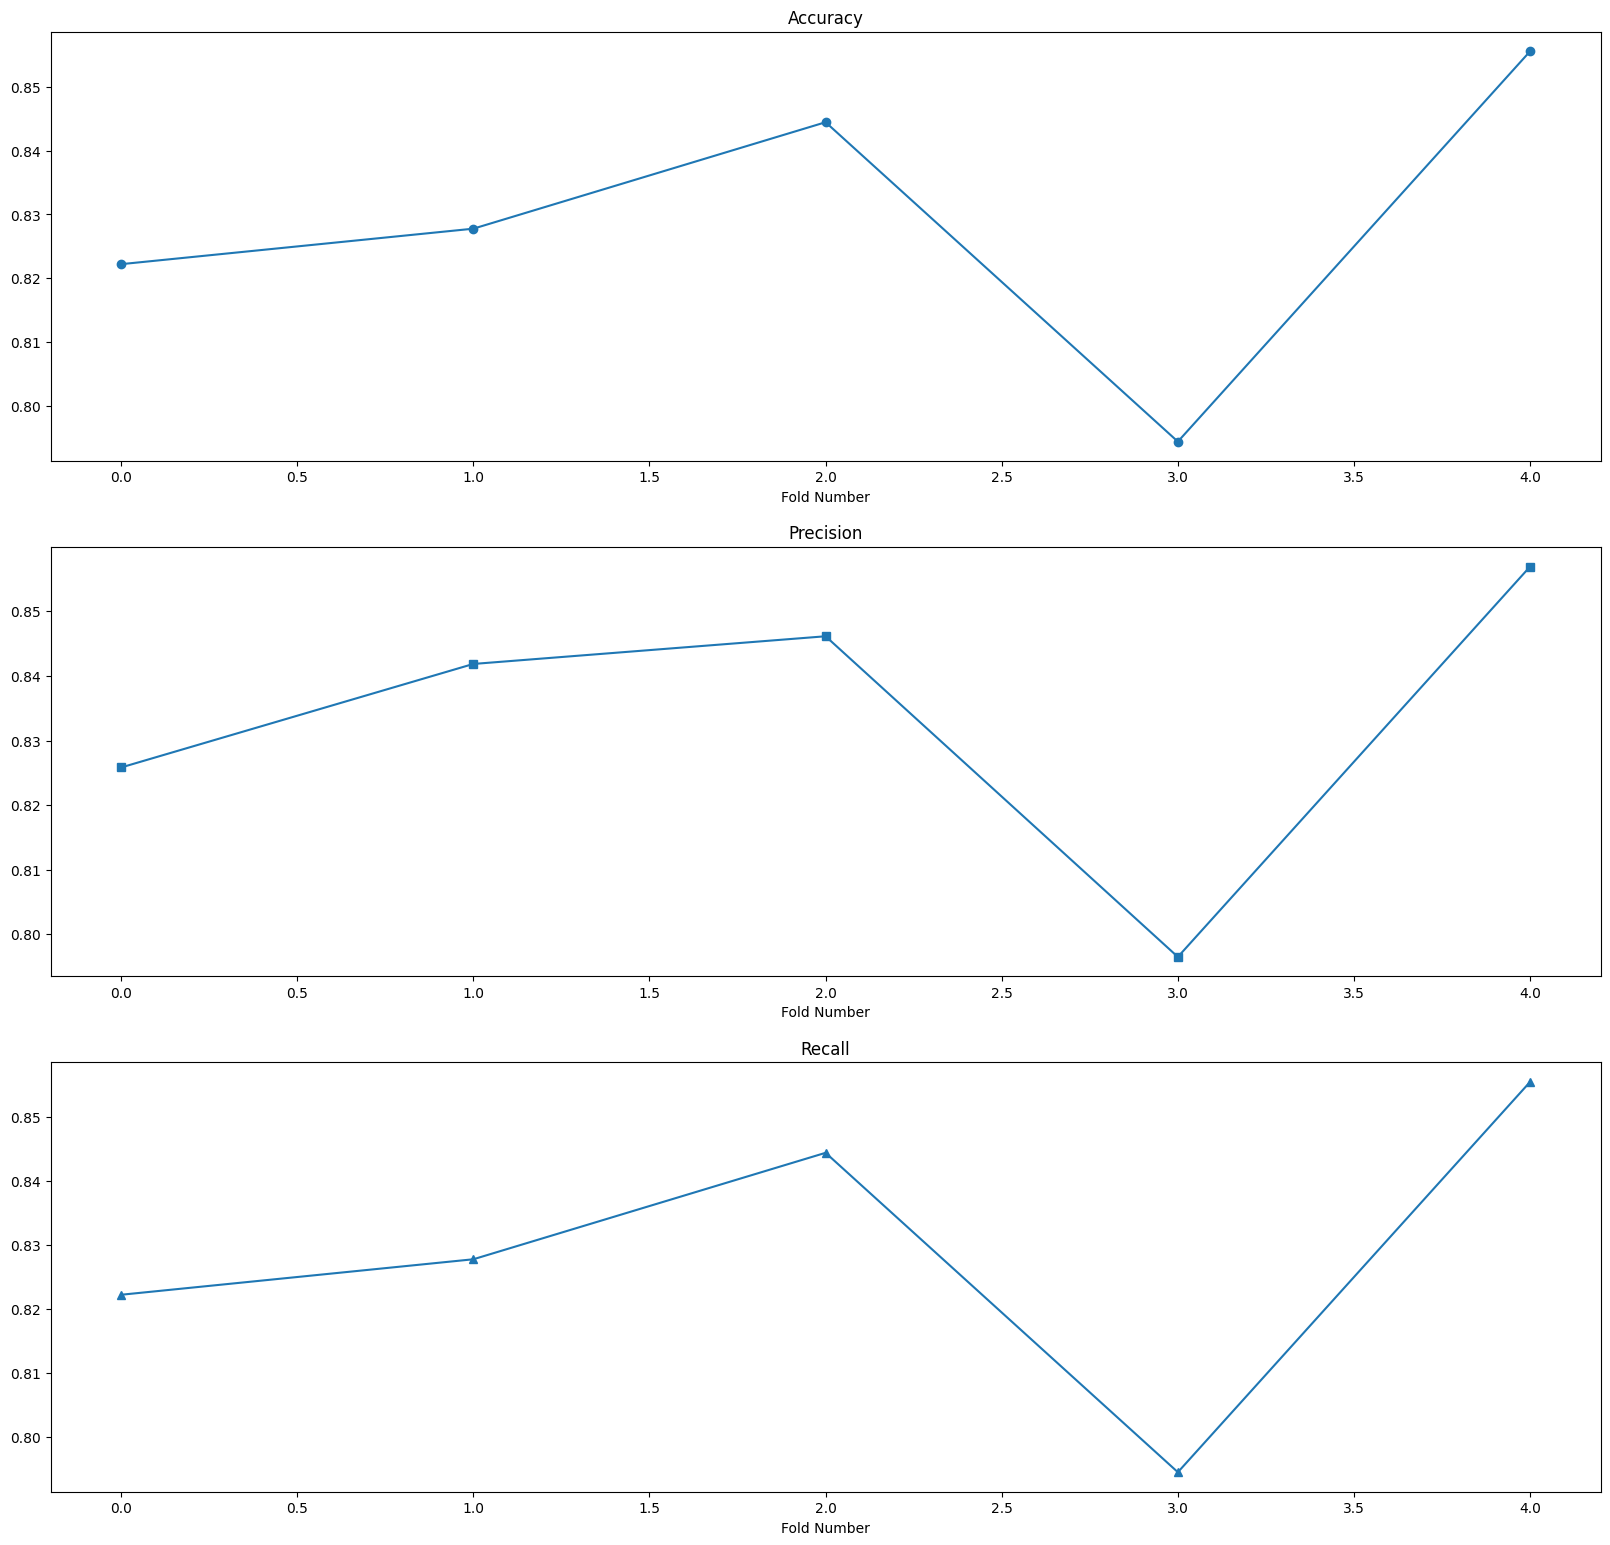

In [12]:
lls = ["Fold 1", "Fold 2", "Fold 3", "Fold 4", "Fold 5"]
plt.figure(figsize=(20, 20))
plt.subplot(3,1,1)
plt.plot(acc, marker='o')
plt.title("Accuracy")
plt.xlabel("Fold Number")
plt.subplots_adjust(bottom = 0.15)
plt.subplot(3,1,2)
plt.plot(prec, marker='s')
plt.title("Precision")
plt.xlabel("Fold Number")
plt.subplots_adjust(bottom = 0.25)
plt.subplot(3,1,3)
plt.plot(rec, marker='^')
plt.title("Recall")
plt.xlabel("Fold Number")
plt.subplots_adjust(bottom = 0.15)
plt.show()
plt.close()